In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("C:/Users/JAAVANIKA L/fall semester 22-23/Downloads/intern/data.csv")

In [23]:
data = data.drop(columns=['id', 'Unnamed: 32'])

In [24]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [25]:
X = data.drop(columns=['diagnosis'])  # Features: everything except diagnosis
y = data['diagnosis'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test) 

In [28]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [30]:
y_pred = (y_probs >= 0.5).astype(int)

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("ROC-AUC Score:", round(roc_auc, 2))

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.98
Recall: 0.95
ROC-AUC Score: 1.0


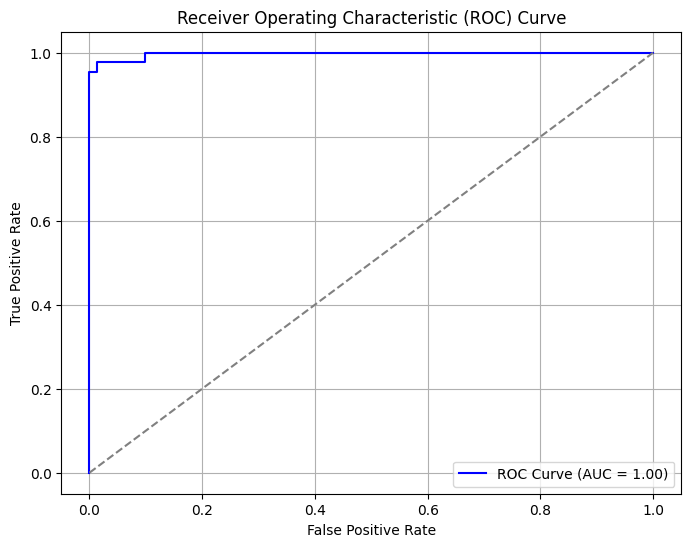

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
new_threshold = 0.3
y_pred_low_thresh = (y_probs >= new_threshold).astype(int)

new_precision = precision_score(y_test, y_pred_low_thresh)
new_recall = recall_score(y_test, y_pred_low_thresh)

print("\nUsing Threshold = 0.3:")
print("New Precision:", round(new_precision, 2))
print("New Recall:", round(new_recall, 2))


Using Threshold = 0.3:
New Precision: 0.91
New Recall: 0.98
